## Introduction

It is important that credit card companies are able to recognize fraudulent credit card transactions`
so that customers are not charged for items that they did not purchase.

## Data Used:

* The dataset contains transactions made by credit cards in September 2013 by European cardholders.

* This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

* It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA.

* The only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

* Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.



# Script

#### Imports 

In [1]:
from pyforest import *
lazy_imports()

#### Reading Dataset

In [2]:
df = pd.read_csv('dataset/creditcard.csv',header = 0)
df.head()

<IPython.core.display.Javascript object>

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### information about dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

* From info() it is clear that our dataset doesnot contain any NULL values and have a total of 284807 datapoints. 
* moreover the dataset has two data types float64 and int64 which is accepted for our project

#### EDA

In [4]:
#### Creating a copy of dataframe for safety
df_eda = df.copy()

In [5]:
df_eda.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#### Describe
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


##### Variable Analysis

In [7]:
#### selecting data variable of interest
df_eda1 = df_eda[['Time','Amount','Class']]

In [8]:
#### value count for class
df_eda1.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Clearly this is a case of data imbalance as class 0 has 284315 datapoints where as 1 has 492 only.

<IPython.core.display.Javascript object>

C:\Users\RAJ\miniconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


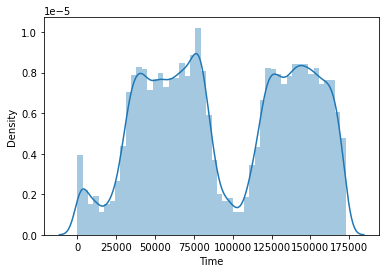

In [9]:
#### distplot Time
sns.distplot(df_eda1['Time'])

There is less transaction at certain time period

<IPython.core.display.Javascript object>

C:\Users\RAJ\miniconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


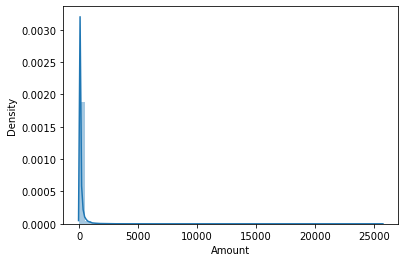

In [10]:
#### distplot Amount
sns.distplot(df_eda1['Amount'])

<IPython.core.display.Javascript object>

C:\Users\RAJ\miniconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


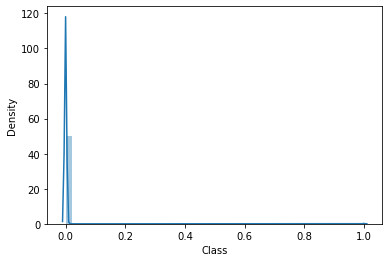

In [11]:
#### distplot Class
sns.distplot(df_eda1['Class'])

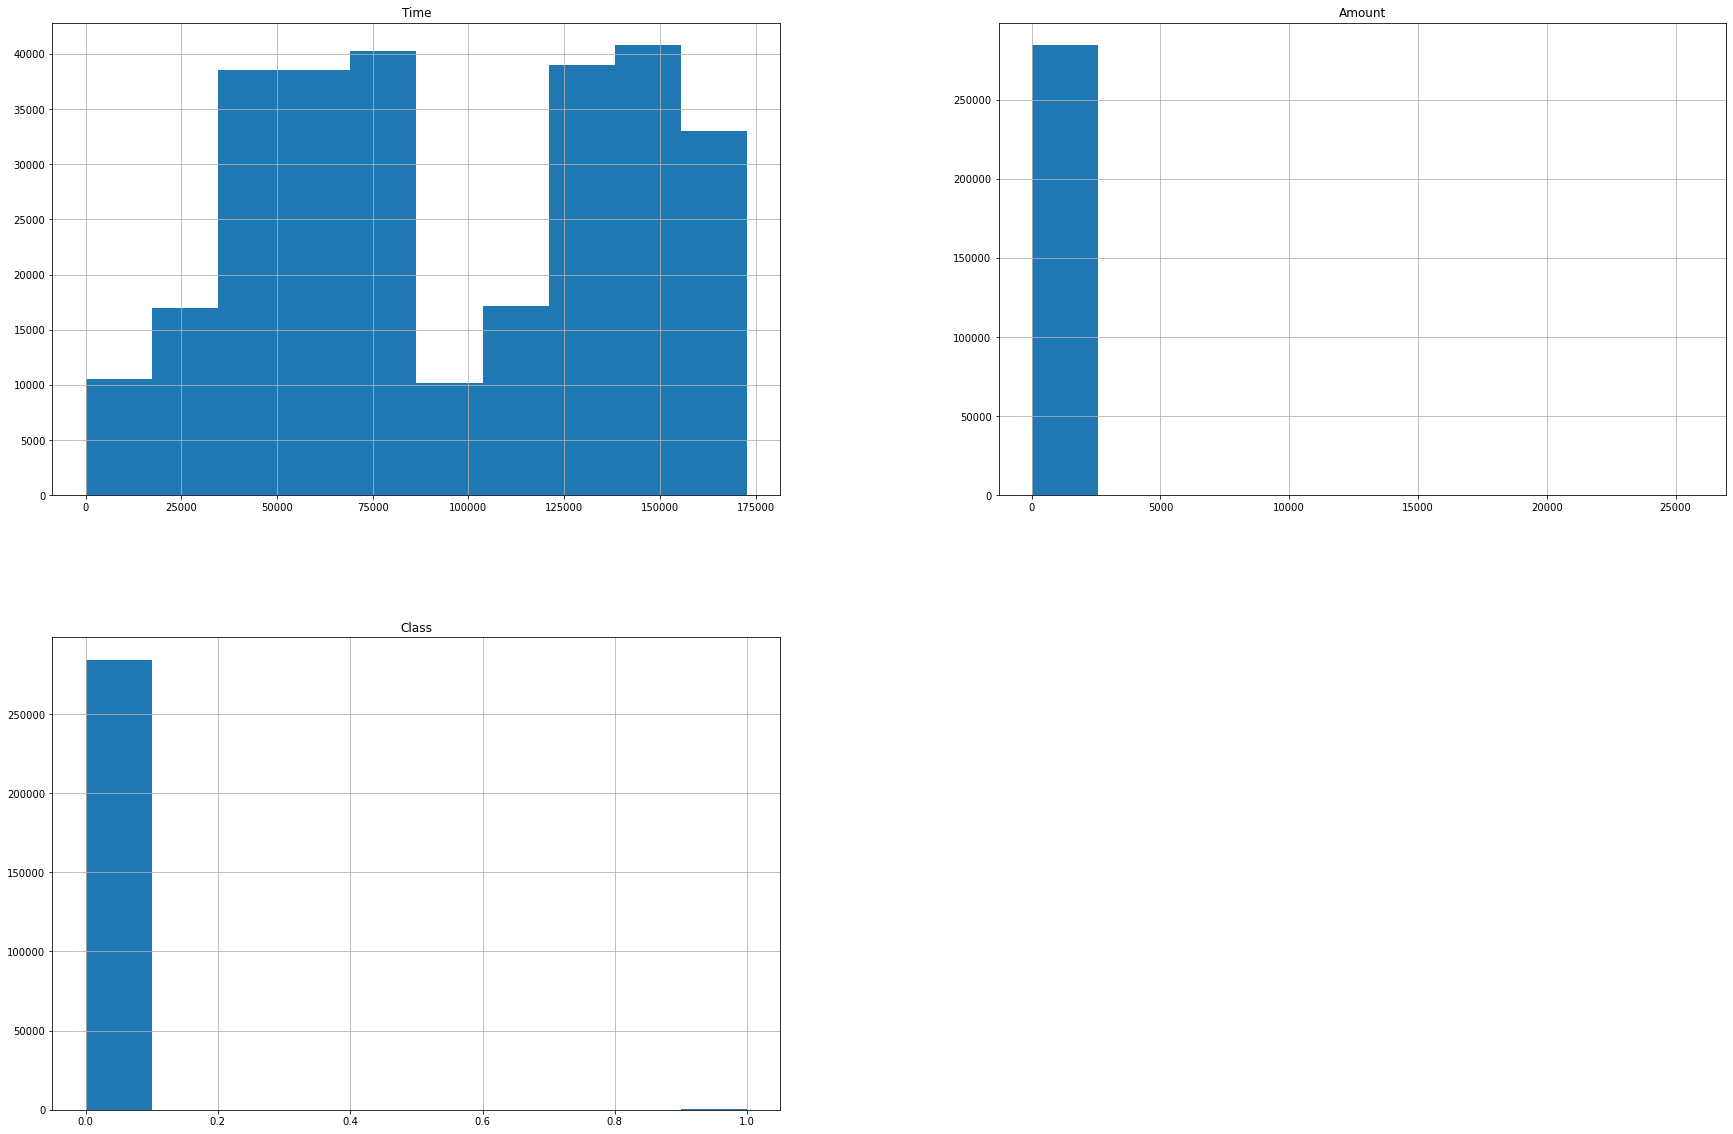

In [12]:
#### histogram
df_eda1.hist(figsize = (30,20));

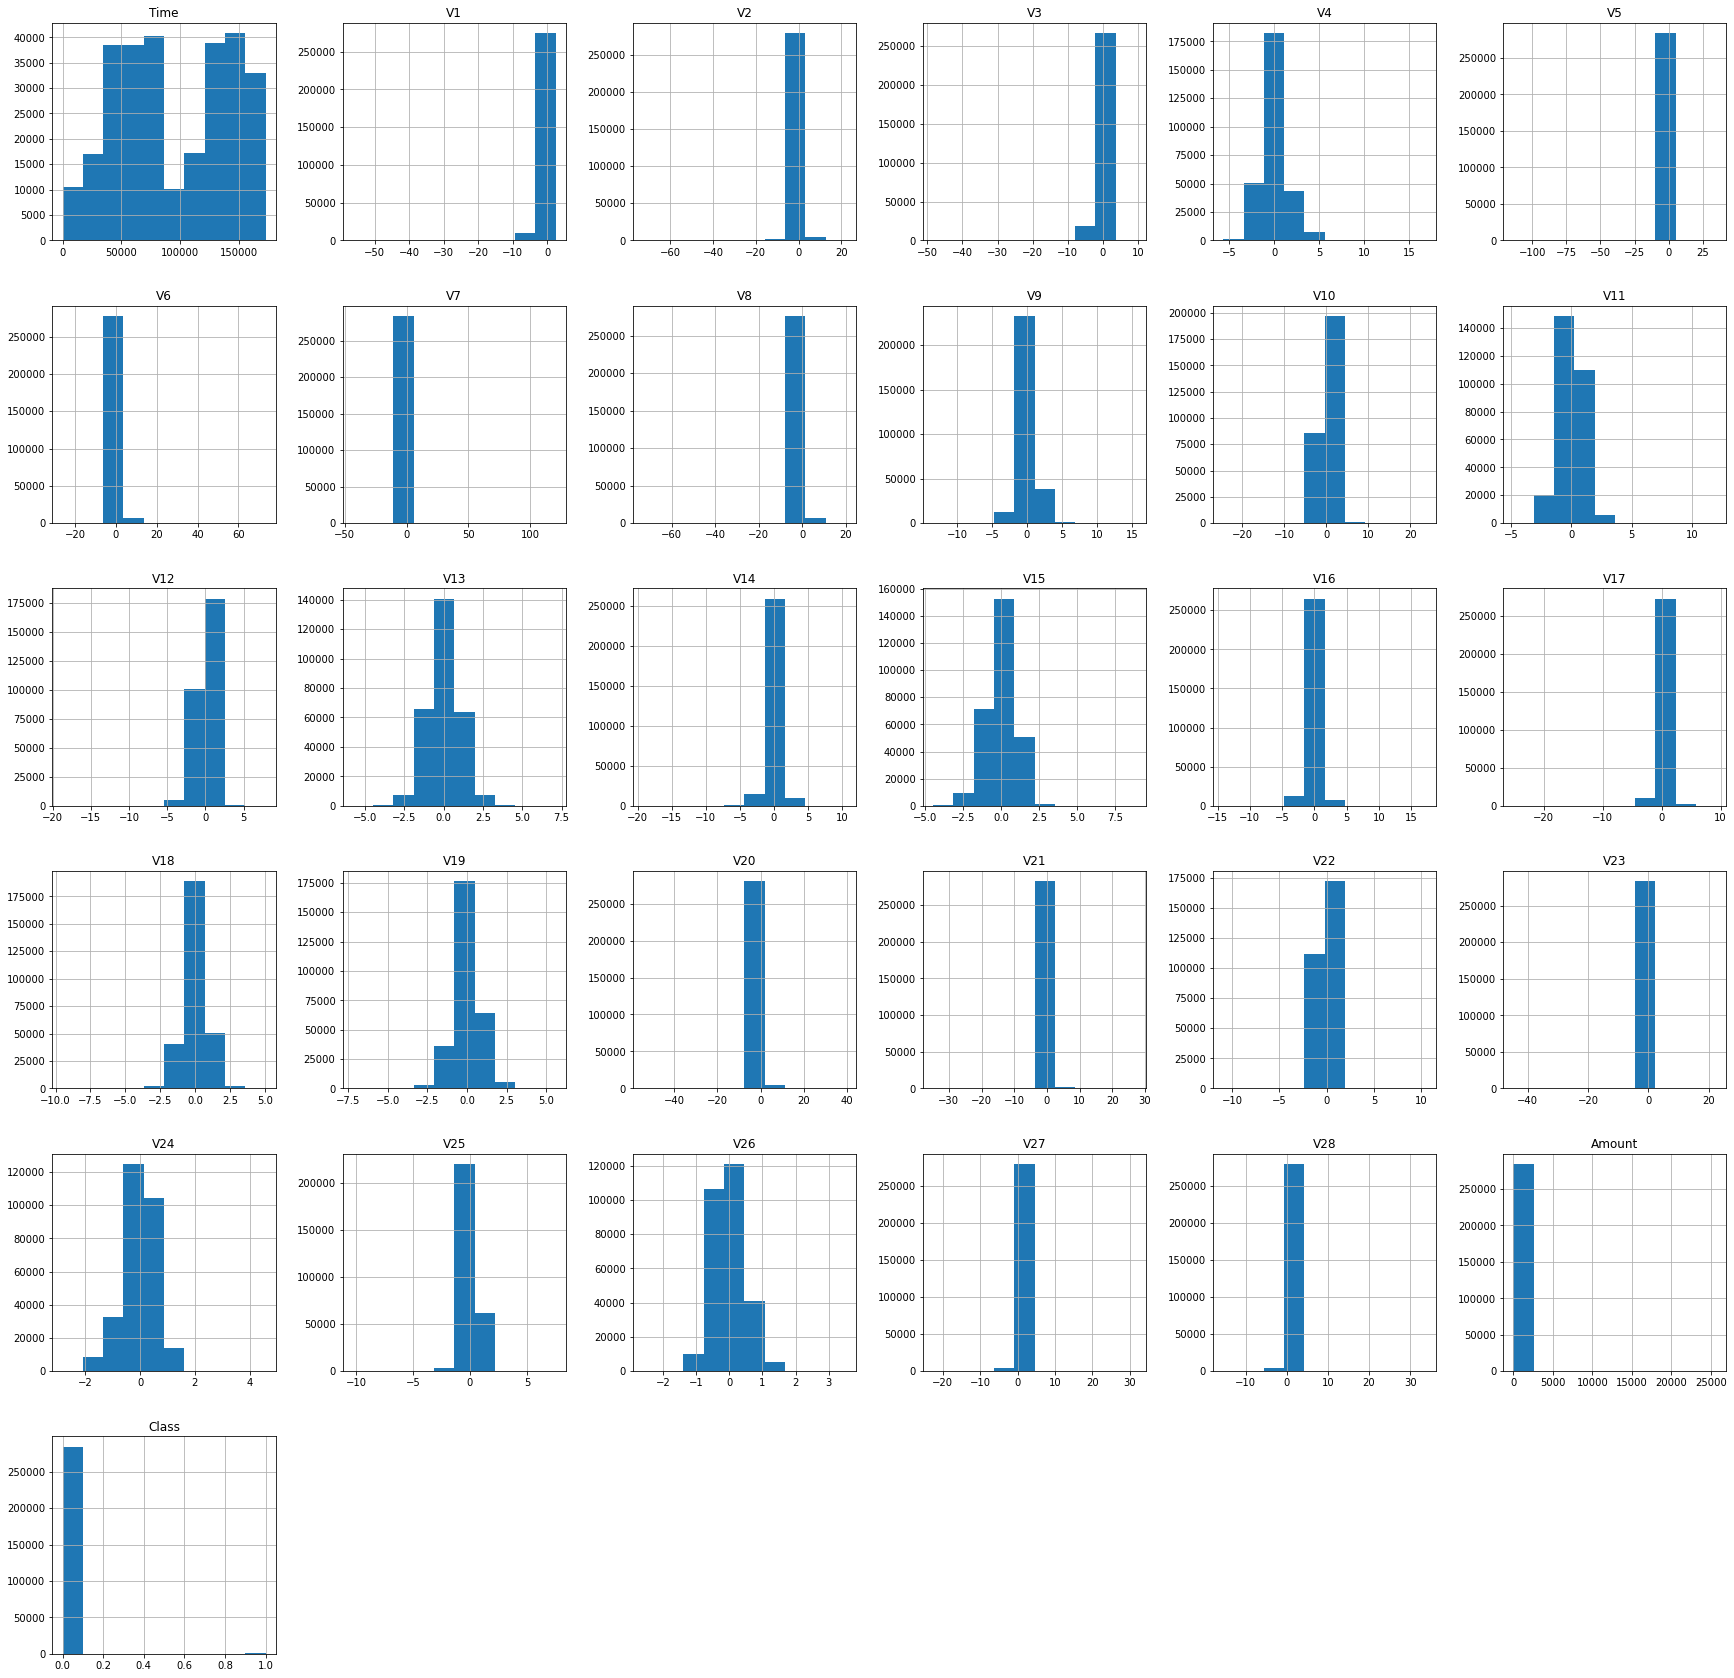

In [13]:
#### hist plot all
df_eda.hist(figsize = (30,30));

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

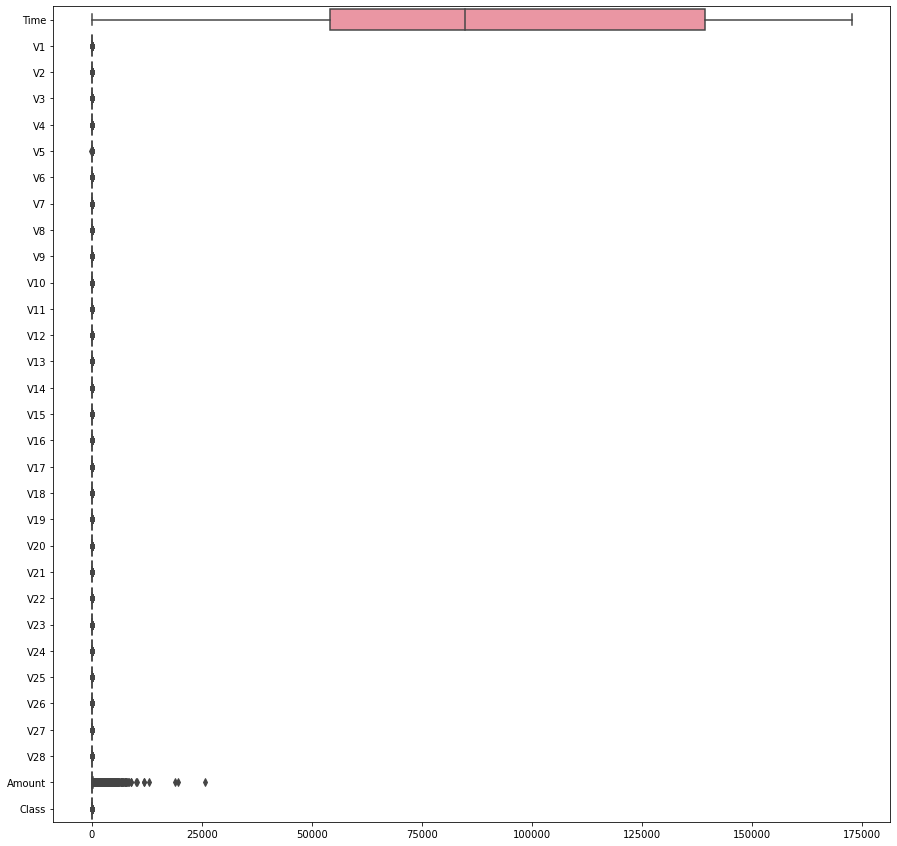

In [14]:
#### boxplot
plt.figure(figsize = (15,15))
sns.boxplot(data = df_eda,orient = 'h')

* Amount contain some outliers
* most variables have less mean and are mostly scaled(PCA used)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

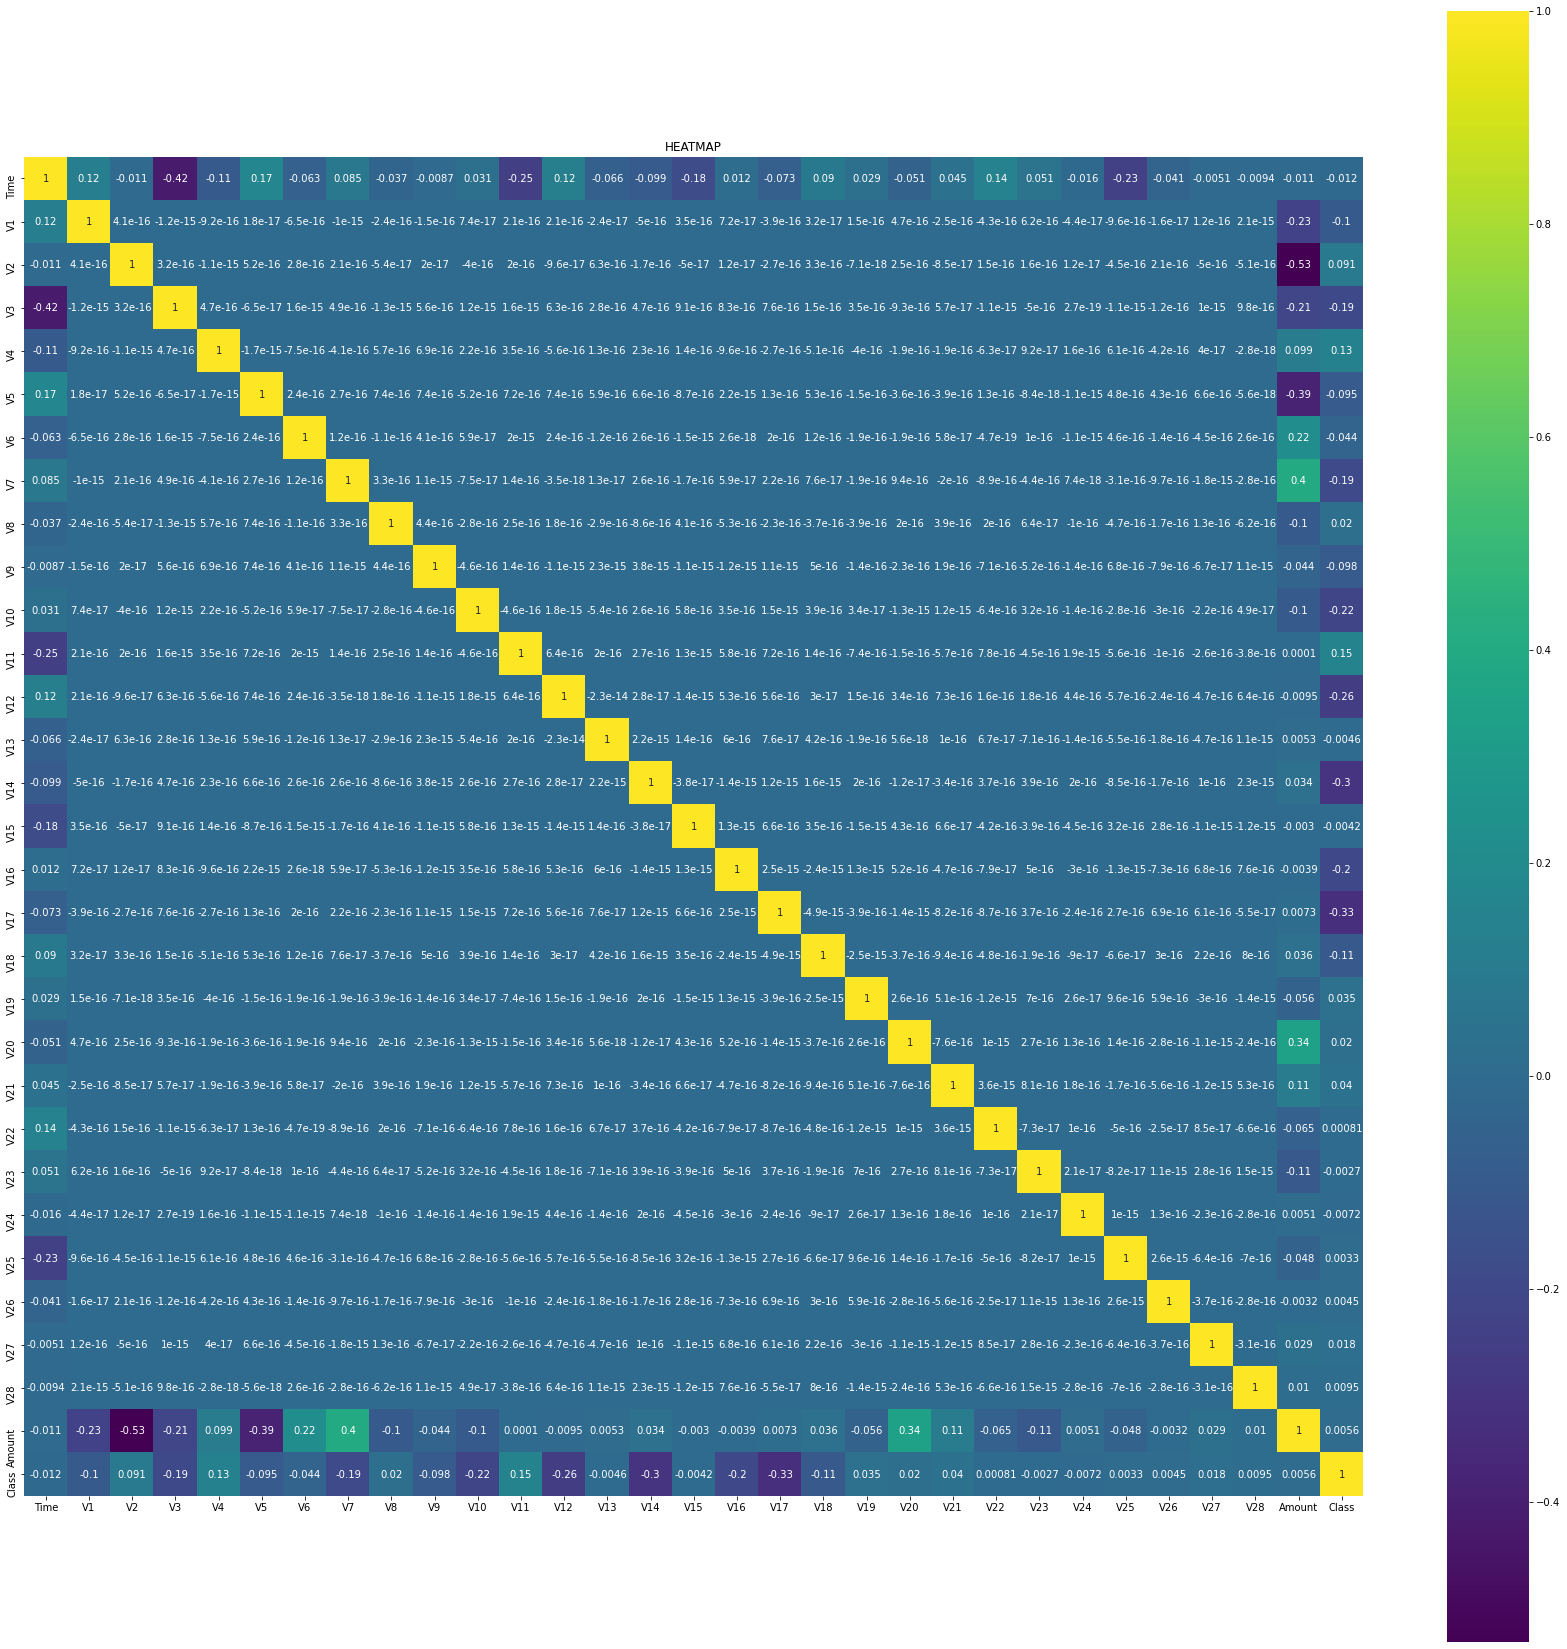

In [15]:
#### correlation
#### heatmap
plt.figure(figsize = (30,30))
sns.heatmap(df_eda.corr(),vmax = 1,square = True,annot = True,cmap = 'viridis')
plt.title("HEATMAP")
plt.show()

In [16]:
#### table correlation
df_eda.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


Very low correlationship between variables

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Ratio of fraud vs non Fraud')

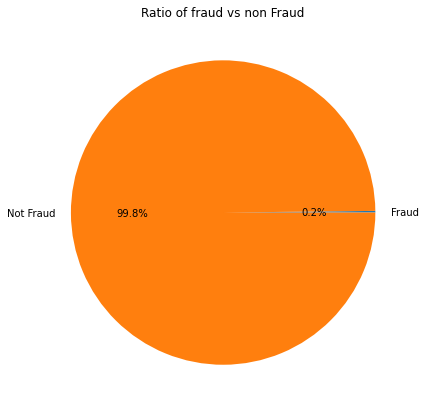

In [17]:
#### pie chart class
fraud_len = len(df_eda[df_eda['Class'] == 1])
nonfraud_len = len(df_eda[df_eda['Class'] == 0])

labels = 'Fraud','Not Fraud'
sizes = [fraud_len,nonfraud_len]

plt.figure(figsize = (8,7))
plt.pie(sizes,labels = labels,autopct = '%1.1f%%')
plt.title('Ratio of fraud vs non Fraud')

This pie chart proves that our data is imbalance with less data points for Fraud.

#### Test Train Split

In [18]:
X = df_eda.drop(['Class'],axis = 1)
y = df_eda['Class']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 13)

<IPython.core.display.Javascript object>

In [19]:
#### concatenating data back for more operation
op_data = pd.concat([X_train,y_train],axis = 1)
op_data.head()

<IPython.core.display.Javascript object>

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
215566,140122.0,0.086069,0.387266,0.127440,-0.556619,-0.387529,0.060215,-0.280396,0.614617,0.204598,...,0.463328,1.255456,0.196293,0.822655,-0.899000,0.418972,-0.090126,-0.043086,39.06,0
22858,32473.0,-0.465710,1.217077,1.209239,0.630117,0.562859,-0.200850,0.890652,-0.180536,-0.754381,...,0.080485,0.259333,-0.413976,-0.430420,0.334263,-0.211793,-0.011911,0.096186,15.00,0
209513,137598.0,2.070123,0.260312,-1.747394,0.494096,0.284482,-1.427115,0.313097,-0.422706,0.505346,...,0.192552,0.766791,-0.045372,-0.156779,0.294803,-0.096326,0.001789,-0.031427,2.43,0
189845,128582.0,-1.441966,-0.431185,1.844713,-1.243164,0.300190,0.103486,0.404096,0.306348,0.180309,...,0.350084,0.609348,-0.057375,0.779813,0.760757,0.104876,-0.053076,0.071385,143.80,0
85474,60787.0,-0.819601,0.990150,1.252831,1.511985,1.154675,-1.109293,1.111530,-0.170764,-1.531189,...,0.127979,0.124606,-0.157511,0.358931,0.158242,-0.122951,0.036074,0.128762,13.61,0


##### Using Dummy Classifier to verify imbalance data output

In [20]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'most_frequent').fit(X_train,y_train)

print('Unique Prediction Label : ',np.unique(dummy.predict(X_test)))
print('Accuracy : ',metrics.accuracy_score(y_test,dummy.predict(X_test)))

<IPython.core.display.Javascript object>

Unique Prediction Label :  [0]


<IPython.core.display.Javascript object>

Accuracy :  0.9983567877306817


* Here the most frequent label is 0
* accuracy is 99.8% which is same as the majority non fraud pie chart illustration

##### Upsampling

Here we are resample the minority class data points to match majority class data points length 

In [21]:
from sklearn.utils import resample

fraud_df = op_data[op_data['Class'] == 1]
nonfraud_df = op_data[op_data['Class'] == 0]

upsampled_fraud = resample(fraud_df,replace = True, # allow replacement
                       n_samples = len(nonfraud_df), # match the length of majority class
                       random_state = 13)
upsampled_df = pd.concat([nonfraud_df,upsampled_fraud])

#checking counts
upsampled_df.Class.value_counts()

<IPython.core.display.Javascript object>

0    213230
1    213230
Name: Class, dtype: int64

##### Logistic Regression on Upsampled data

In [22]:
X_log_train = upsampled_df.drop(['Class'],axis = 1)
y_log_train = upsampled_df['Class']

logit_up = LogisticRegression(solver = 'liblinear').fit(X_log_train,y_log_train)

print('Accuracy :',metrics.accuracy_score(y_test,logit_up.predict(X_test)))
print('Classification report :',metrics.classification_report(y_test,logit_up.predict(X_test)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy : 0.9808853683885285


<IPython.core.display.Javascript object>

Classification report :               precision    recall  f1-score   support

           0       1.00      0.98      0.99     71085
           1       0.07      0.88      0.13       117

    accuracy                           0.98     71202
   macro avg       0.54      0.93      0.56     71202
weighted avg       1.00      0.98      0.99     71202



In [23]:
print('Confusion Matrix :',metrics.confusion_matrix(y_test,logit_up.predict(X_test)))

<IPython.core.display.Javascript object>

Confusion Matrix : [[69738  1347]
 [   14   103]]


##### Downsampling

Here we are trying to resample the majority class data points to match the length of minority class data points

In [24]:
from sklearn.utils import resample

fraud_df = op_data[op_data['Class'] == 1]
nonfraud_df = op_data[op_data['Class'] == 0]

downsampled_nonfraud = resample(nonfraud_df,replace = False, # not allow replacement
                       n_samples = len(fraud_df), # match the length of majority class
                       random_state = 13)
downsampled_df = pd.concat([fraud_df,downsampled_nonfraud])

#checking counts
downsampled_df.Class.value_counts()

<IPython.core.display.Javascript object>

0    375
1    375
Name: Class, dtype: int64

##### Logistic Regression on downsampled data

In [25]:
X_log_train2 = downsampled_df.drop(['Class'],axis = 1)
y_log_train2 = downsampled_df['Class']

logit_down = LogisticRegression(solver = 'liblinear').fit(X_log_train2,y_log_train2)

print('Accuracy :',metrics.accuracy_score(y_test,logit_down.predict(X_test)))
print('Classification report :',metrics.classification_report(y_test,logit_down.predict(X_test)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy : 0.9823740906154321


<IPython.core.display.Javascript object>

Classification report :               precision    recall  f1-score   support

           0       1.00      0.98      0.99     71085
           1       0.08      0.88      0.14       117

    accuracy                           0.98     71202
   macro avg       0.54      0.93      0.57     71202
weighted avg       1.00      0.98      0.99     71202



In [26]:
print('Confusion Matrix :',metrics.confusion_matrix(y_test,logit_down.predict(X_test)))

<IPython.core.display.Javascript object>

Confusion Matrix : [[69844  1241]
 [   14   103]]


Here from the above two method: Upsample has a sight better metrics then downsample !

##### Generate Synthetic Samples
###### SMOTE (Synthetic Minority Oversampling Technique)

It is a very popular technique to generate synthetic observations of minority class

In [27]:
y_sm = df_eda['Class']
X_sm = df_eda.drop(['Class'],axis = 1)

X_train_sm,X_test_sm,y_train_sm,y_test_sm = train_test_split(X_sm,y_sm,test_size = 0.25,random_state = 13)

<IPython.core.display.Javascript object>

In [28]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 13)
X_train_sm ,y_train_sm = sm.fit_sample(X_train_sm,y_train_sm)

##### logistic regression for SMOTE data

In [29]:
logit_sm = LogisticRegression(solver = 'liblinear').fit(X_train_sm,y_train_sm)

print('Accuracy :',metrics.accuracy_score(y_test_sm,logit_sm.predict(X_test_sm)))
print('Classification report :',metrics.classification_report(y_test_sm,logit_sm.predict(X_test_sm)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy : 0.9878655093958035


<IPython.core.display.Javascript object>

Classification report :               precision    recall  f1-score   support

           0       1.00      0.99      0.99     71085
           1       0.11      0.87      0.19       117

    accuracy                           0.99     71202
   macro avg       0.55      0.93      0.59     71202
weighted avg       1.00      0.99      0.99     71202



In [30]:
print('Confusion Matrix :',metrics.confusion_matrix(y_test_sm,logit_sm.predict(X_test_sm)))

<IPython.core.display.Javascript object>

Confusion Matrix : [[70236   849]
 [   15   102]]


 ##### Random Forest Clalssifier

In [31]:
randf = RandomForestClassifier(n_estimators = 20).fit(X_train_sm,y_train_sm)

print('Accuracy :',metrics.accuracy_score(y_test_sm,randf.predict(X_test_sm)))
print('Classification report :',metrics.classification_report(y_test_sm,randf.predict(X_test_sm)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy : 0.999592708069998


<IPython.core.display.Javascript object>

Classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.91      0.84      0.87       117

    accuracy                           1.00     71202
   macro avg       0.95      0.92      0.94     71202
weighted avg       1.00      1.00      1.00     71202



In [32]:
print('Confusion Matrix :',metrics.confusion_matrix(y_test_sm,randf.predict(X_test_sm)))

<IPython.core.display.Javascript object>

Confusion Matrix : [[71075    10]
 [   19    98]]


##### naive bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train_sm,y_train_sm)

print('Accuracy :',metrics.accuracy_score(y_test_sm,gnb.predict(X_test_sm)))
print('Classification report :',metrics.classification_report(y_test_sm,gnb.predict(X_test_sm)))

<IPython.core.display.Javascript object>

Accuracy : 0.992275497879273


<IPython.core.display.Javascript object>

Classification report :               precision    recall  f1-score   support

           0       1.00      0.99      1.00     71085
           1       0.15      0.77      0.25       117

    accuracy                           0.99     71202
   macro avg       0.57      0.88      0.62     71202
weighted avg       1.00      0.99      0.99     71202



In [34]:
print('Confusion Matrix :',metrics.confusion_matrix(y_test_sm,gnb.predict(X_test_sm)))

<IPython.core.display.Javascript object>

Confusion Matrix : [[70562   523]
 [   27    90]]


##### SVM using gridsearch

In [35]:
#param_grid = {'C': [1] }
    
#svm_grid = GridSearchCV(svm.SVC(kernel = 'rbf',probability = True),param_grid,
                            #verbose = 10,scoring = 'roc_auc',cv = 5,n_jobs = 1 ).fit(X_train_sm,y_train_sm)
    
#svm_best = svm_grid.best_estimator_
#svm_best = svm.SVC(kernel = 'rbf',probability = True,C = 1).fit(X_train_sm,y_train_sm)
#print('Best param : ',svm_grid.best_params_)
#print('Accuracy :',metrics.accuracy_score(y_test_sm,svm_best.predict(X_test_sm)))
#print('Classification report :',metrics.classification_report(y_test_sm,svm_best.predict(X_test_sm)))

In [36]:
#print('Confusion Matrix :',metrics.confusion_matrix(y_test_sm,svm_best.predict(X_test_sm)))

#### ROC Compare 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

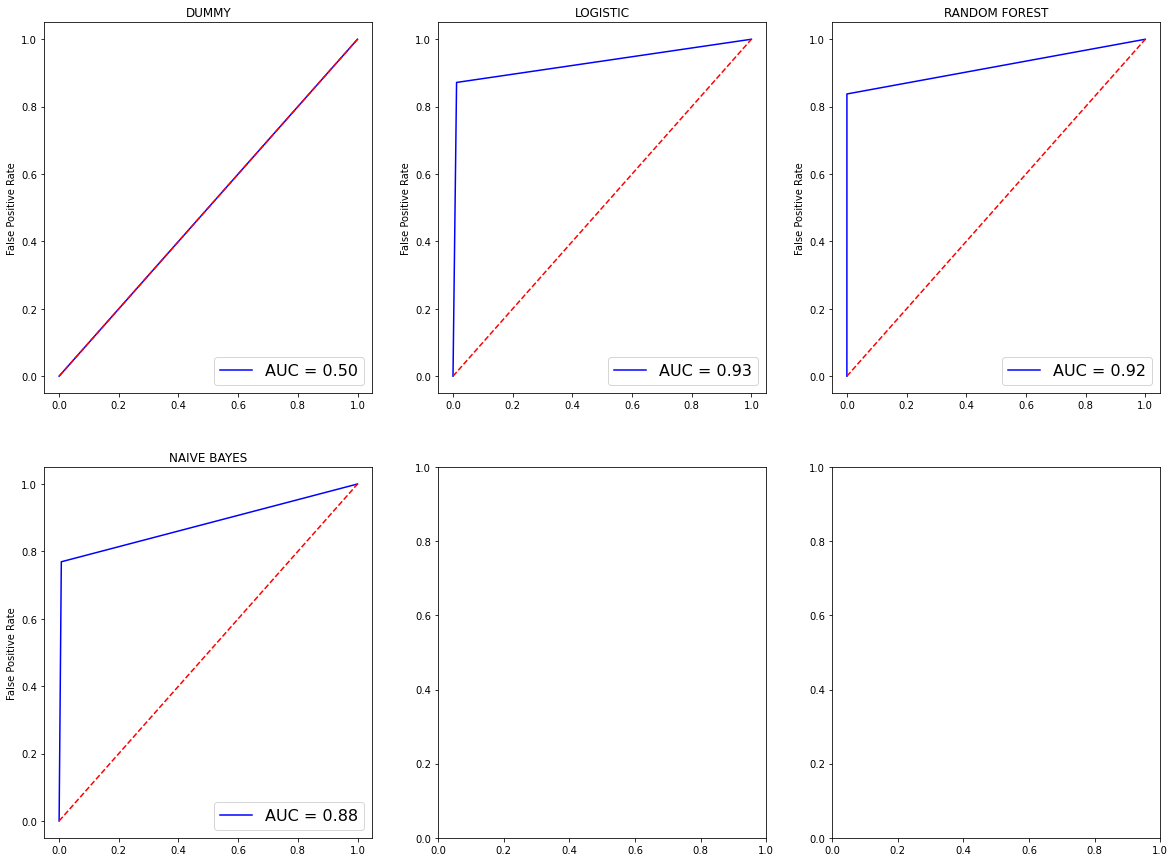

In [44]:
fig,ax_arr = plt.subplots(2,3,figsize = (20,15))

#---------------Dummy---------------

dummy_pred = dummy.predict(X_test)
fprdm,tprdm,thresholddm = metrics.roc_curve(y_test,dummy_pred) #fprdm - false positive rate,tprdm = true positive rate
roc_aucxgb = metrics.auc(fprdm,tprdm)

ax_arr[0,0].plot(fprdm,tprdm, 'b',label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,0].plot([0,1],[0,1],'r--')
ax_arr[0,0].set_title('DUMMY')
ax_arr[0,0].set_ylabel('True Positive Rate')
ax_arr[0,0].set_ylabel('False Positive Rate')
ax_arr[0,0].legend(loc = 'lower right',prop = {'size':16})

#---------------Logistic---------------

fprdm,tprdm,thresholddm = metrics.roc_curve(y_test,logit_sm.predict(X_test_sm))
roc_aucxgb = metrics.auc(fprdm,tprdm)

ax_arr[0,1].plot(fprdm,tprdm, 'b',label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,1].plot([0,1],[0,1],'r--')
ax_arr[0,1].set_title('LOGISTIC')
ax_arr[0,1].set_ylabel('True Positive Rate')
ax_arr[0,1].set_ylabel('False Positive Rate')
ax_arr[0,1].legend(loc = 'lower right',prop = {'size':16})

#---------------SMOTE---------------

"""fprdm,tprdm,thresholddm = metrics.roc_curve(y_test,sm.predict(X_test_sm))
roc_aucxgb = metrics.auc(fprdm,tprdm)

ax_arr[0,0].plot(fprdm,tprdm, 'b',label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,0].plot([0,1],[0,1],'r--')
ax_arr[0,0].set_title('SMOTE')
ax_arr[0,0].set_ylabel('True Positive Rate')
ax_arr[0,0].set_ylabel('False Positive Rate')
ax_arr[0,0].legend(loc = 'lower right',prop = {'size':16})
"""
#---------------Random Forest ---------------

fprdm,tprdm,thresholddm = metrics.roc_curve(y_test,randf.predict(X_test_sm))
roc_aucxgb = metrics.auc(fprdm,tprdm)

ax_arr[0,2].plot(fprdm,tprdm, 'b',label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,2].plot([0,1],[0,1],'r--')
ax_arr[0,2].set_title('RANDOM FOREST')
ax_arr[0,2].set_ylabel('True Positive Rate')
ax_arr[0,2].set_ylabel('False Positive Rate')
ax_arr[0,2].legend(loc = 'lower right',prop = {'size':16})

#---------------NAIVE BAYES---------------

fprdm,tprdm,thresholddm = metrics.roc_curve(y_test,gnb.predict(X_test_sm))
roc_aucxgb = metrics.auc(fprdm,tprdm)

ax_arr[1,0].plot(fprdm,tprdm, 'b',label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[1,0].plot([0,1],[0,1],'r--')
ax_arr[1,0].set_title('NAIVE BAYES')
ax_arr[1,0].set_ylabel('True Positive Rate')
ax_arr[1,0].set_ylabel('False Positive Rate')
ax_arr[1,0].legend(loc = 'lower right',prop = {'size':16})

#---------------SVM---------------

#fprdm,tprdm,thresholddm = metrics.roc_curve(y_test,svm_best.predict(X_test_sm))
#roc_aucxgb = metrics.auc(fprdm,tprdm)

#ax_arr[0,0].plot(fprdm,tprdm, 'b',label = 'AUC = %0.2f' % roc_aucxgb)
#ax_arr[0,0].plot([0,1],[0,1],'r--')
#ax_arr[0,0].set_title('GRIDSEARCH CV : SVM',fontyt_size = 20)
#ax_arr[0,0].set_ylabel('True Positive Rate')
#ax_arr[0,0].set_ylabel('False Positive Rate')
#ax_arr[0,0].legend(loc = 'lower right',prop = {'size':16})
